Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


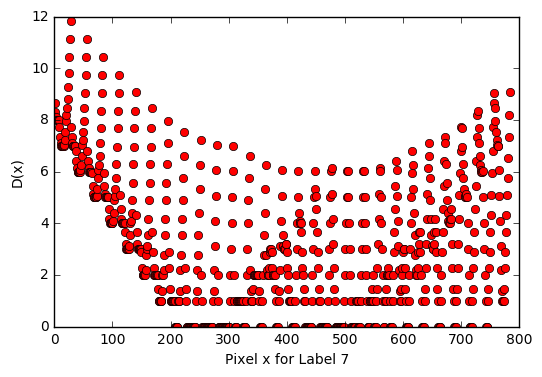

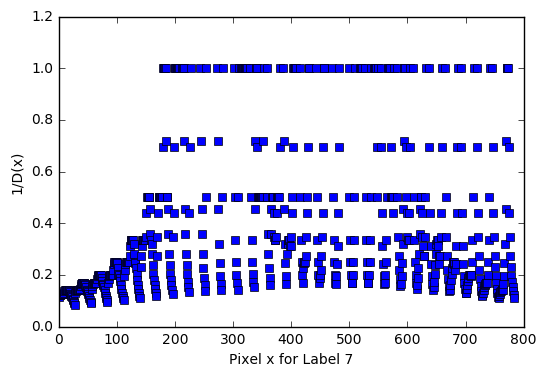

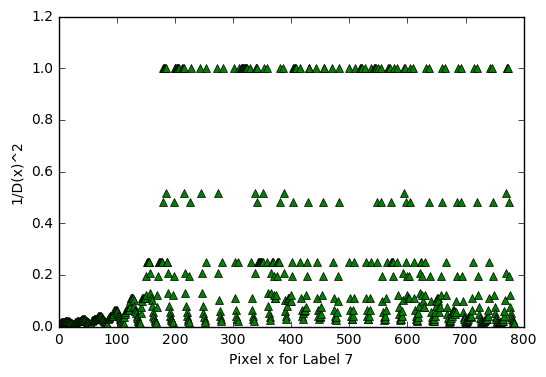

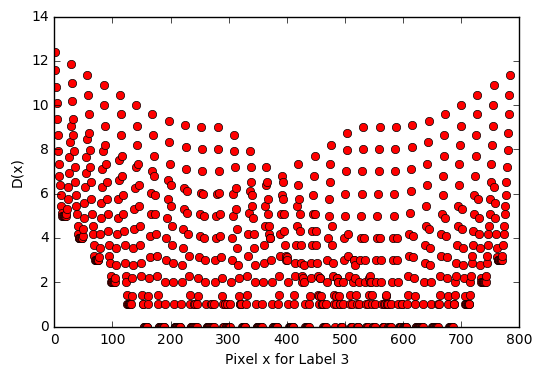

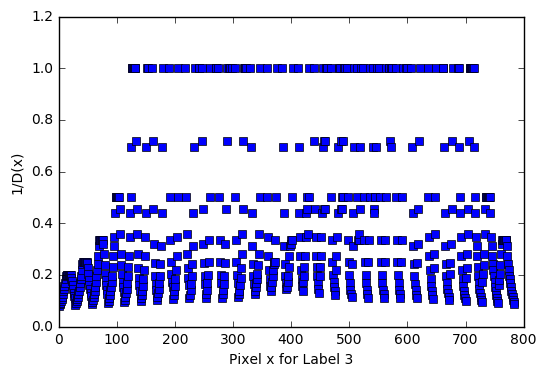

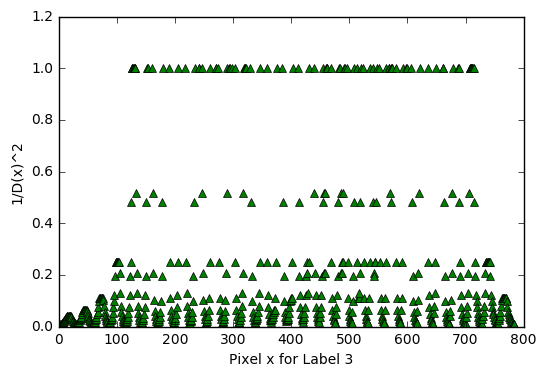

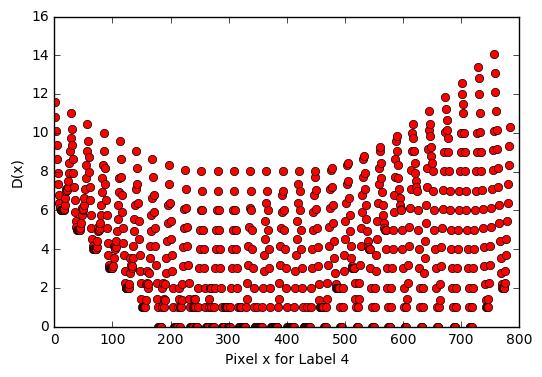

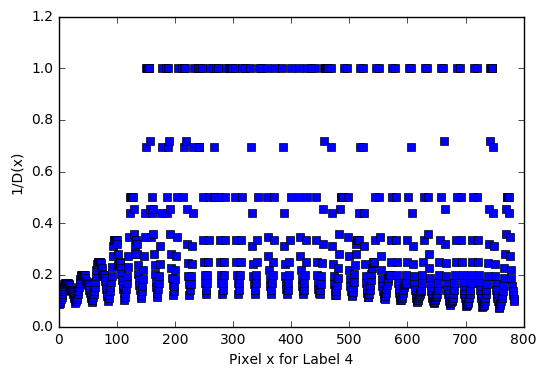

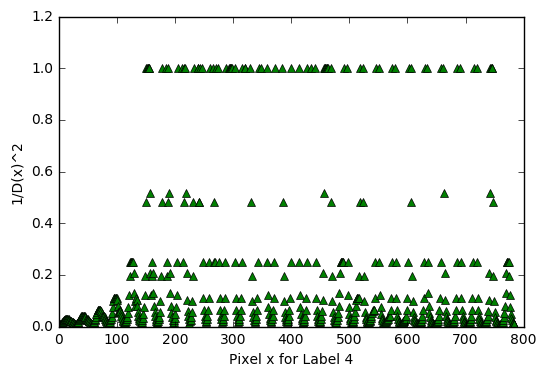

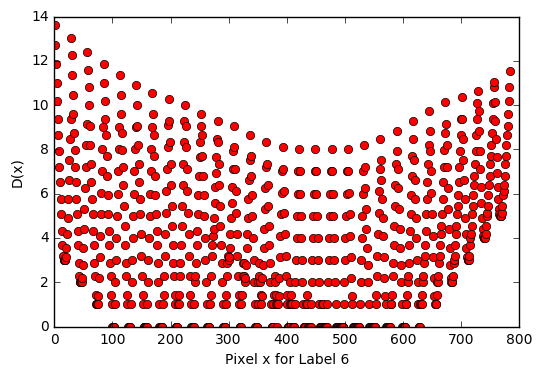

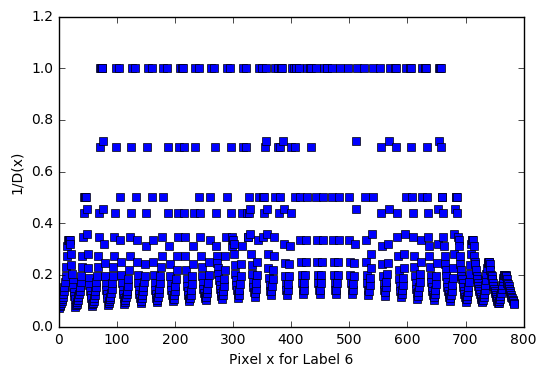

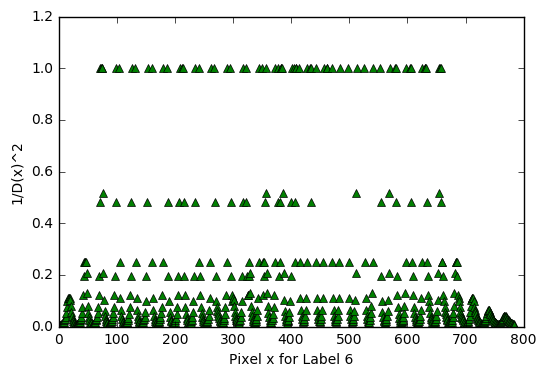

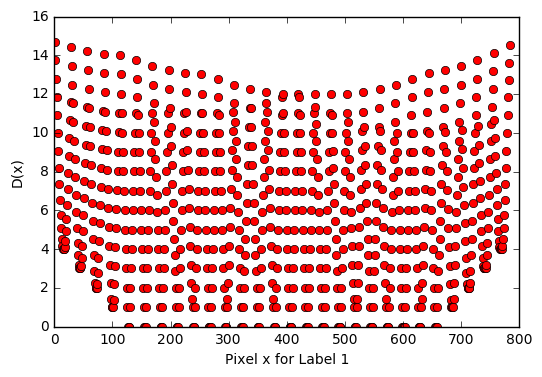

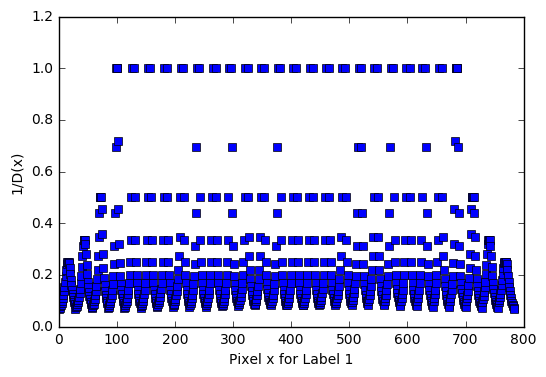

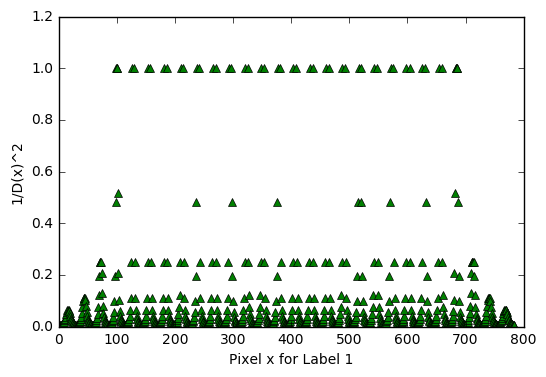

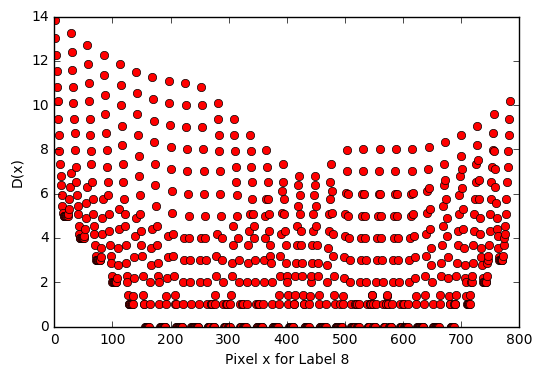

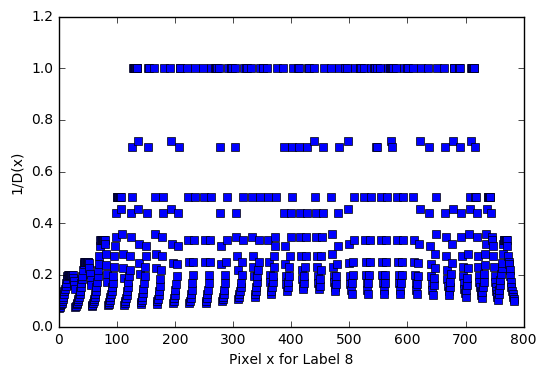

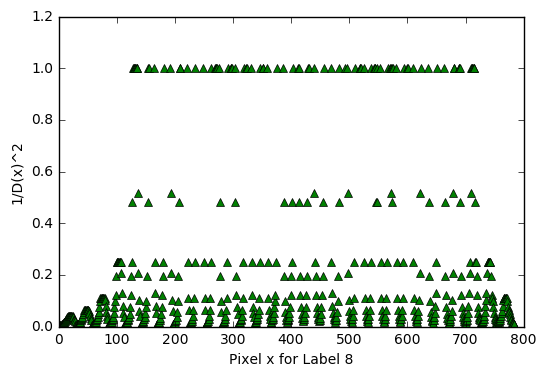

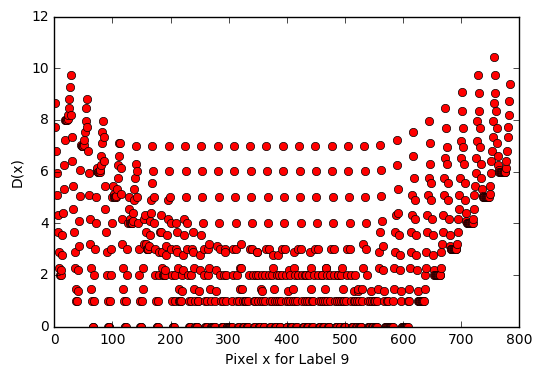

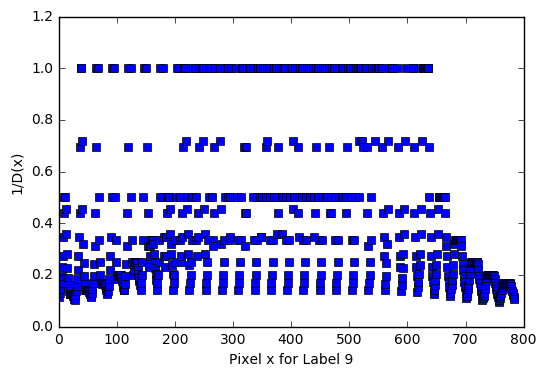

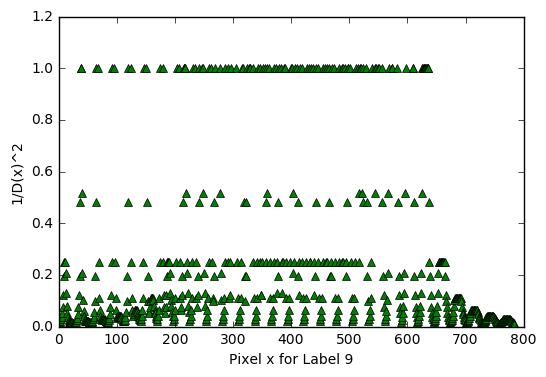

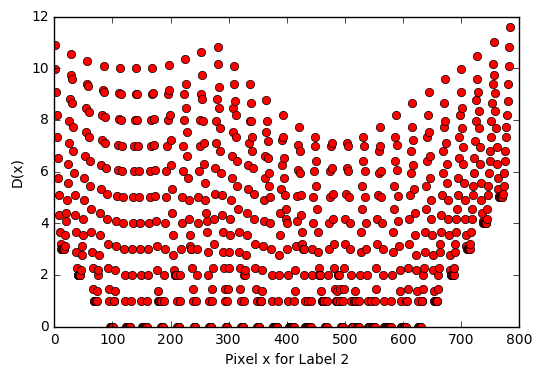

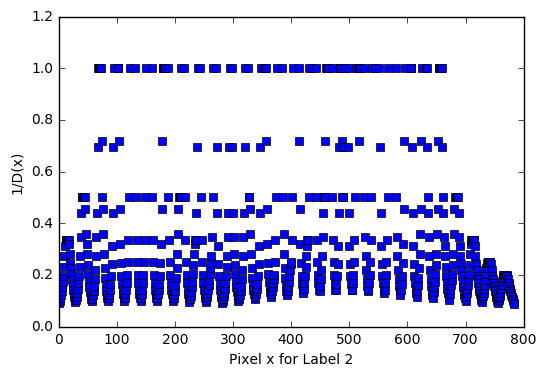

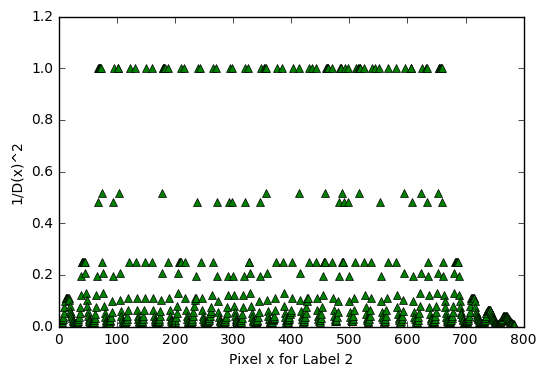

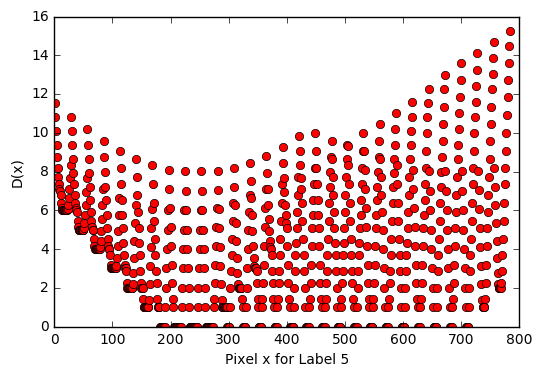

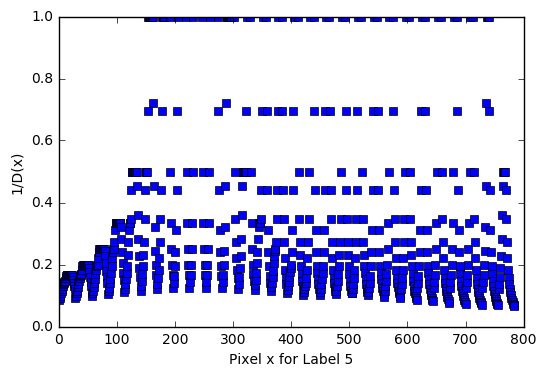

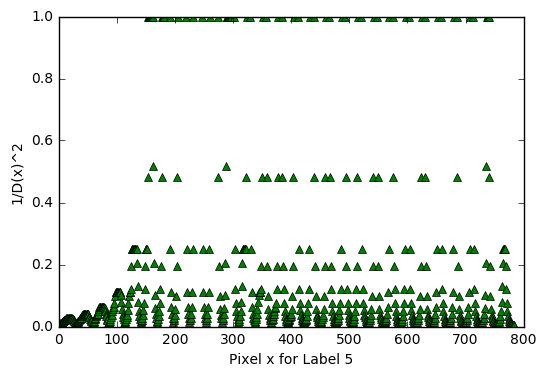

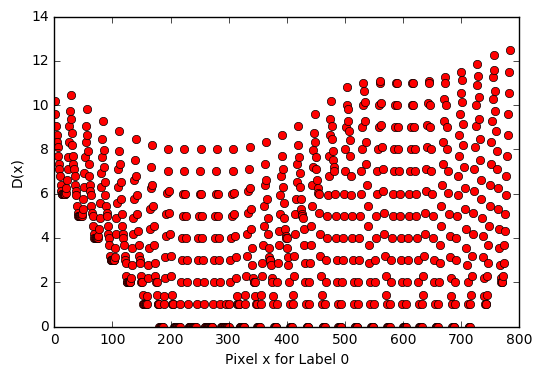

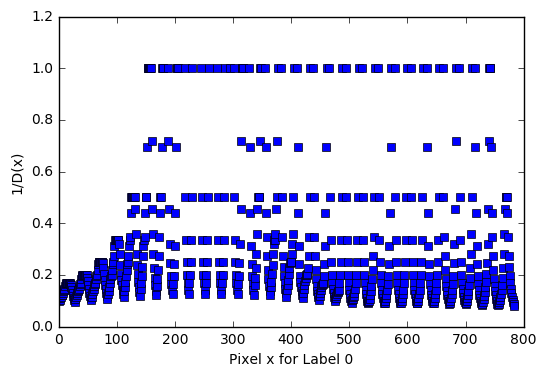

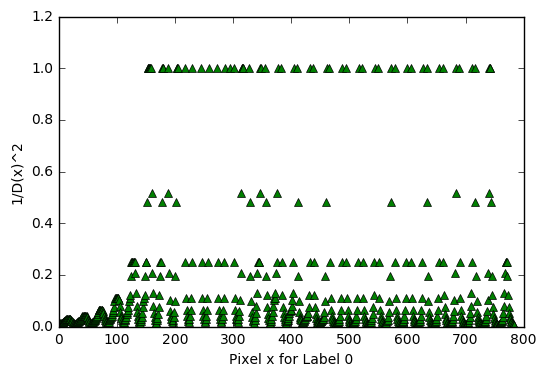

KeyboardInterrupt: 

In [62]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

graph_y = np.ndarray([10], dtype = object)
for i in range(0, 10):
    graph_y[i] = []

relative = np.zeros([784])
for i in range(1, 785):
    relative[i-1] = i

label_used = [False]*10
counter =0

# Brute force, should use a KD tree to make nearest neighbor computation quicker but infinite time :D
while True:
    batch_x, batch_y = mnist.train.next_batch(128)
    for pixels in batch_x:
        labelnumber =0
        for i in range(0, 10):
            if isclose(batch_y[counter][i], 1):
                labelnumber = i
                break

        if label_used[labelnumber]:
            continue

        label_used[labelnumber] = True

        temp = []
        for i in range(0, 784):
            minimum = 100000
            x_i = i/28
            y_i = i%28
            for j in range(0, 784):
                if not isclose(pixels[j], 0):
                    x_j = j/28
                    y_j = j%28
                    distance = ((x_i - x_j)**2 + (y_i - y_j)**2)**0.5
                    if distance < minimum:
                        minimum = distance        
            temp.append(minimum)
        graph_y[labelnumber] +=temp
        plt.plot(relative, graph_y[labelnumber], 'ro')
        plt.ylabel("D(x)")
        plt.xlabel("Pixel x for Label %s" %(labelnumber))
        plt.savefig("C:\\Users\\Michael Luo\\Documents\\D(x)Images\\Label %s Normal.png" %(labelnumber), bbox_inches='tight')
        plt.show()
        plt.plot(relative, np.reciprocal(graph_y[labelnumber]), 'bs')
        plt.ylabel("1/D(x)")
        plt.xlabel("Pixel x for Label %s" %(labelnumber))
        plt.savefig("C:\\Users\\Michael Luo\\Documents\\D(x)Images\\Label %s Inverse" %(labelnumber), bbox_inches='tight')
        plt.show()
        plt.plot(relative, np.square(np.reciprocal(graph_y[labelnumber])), 'g^')
        plt.ylabel("1/D(x)^2")
        plt.xlabel("Pixel x for Label %s" %(labelnumber))
        plt.savefig("C:\\Users\\Michael Luo\\Documents\\D(x)Images\\Label %s Inverse^2.png" %(labelnumber), bbox_inches='tight')
        plt.show()
        counter+=1

        
            